# Testing a base model

Currently i've chosen keras, as it would be quick to try things out + exam comming up (using keras) on 13th of January

In [1]:
# %pip install scikit-learn keras 'tensorflow[and-cuda]' opencv-python python-dotenv pandas sqlalchemy PyMySQL matplotlib scikit-image imgaug

In [ ]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

2025-01-19 18:12:13.076580: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-19 18:12:13.087228: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1737306733.099390  209865 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1737306733.103233  209865 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-19 18:12:13.116840: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
import keras
import numpy as np
import pandas as pd
import sys

In [ ]:
from FrameLoader import FrameLoader
from DataRepository import DataRepository
from helpers import plot

In [5]:
import os
import psutil

def process_memory():
    "Returns megabytes"
    process = psutil.Process(os.getpid())
    mem_info = process.memory_info()
    return mem_info.rss / 1024 / 1024 / 1024

print(f"Current memory usage: {process_memory()} gigabytes")

Current memory usage: 0.7414093017578125 gigabytes


In [6]:
repo = DataRepository()
repo.VideoNames.head()
# repo.VideoNames.iloc[0]["name"]

connection established, loading frame paths
rel paths of framelabels loaded


folderId   id                                               name
id                                                                   
642         3  642           competition/belgium/DD3/2023-PK-ZO-7.mp4
643         3  643  competition/belgium/DD3/2023-PK-ZO-8-3DD-Lara.mp4
644         3  644           competition/belgium/DD3/2023-PK-ZO-9.mp4
645         3  645          competition/belgium/DD3/2023-proef-za.mp4
646         3  646          competition/belgium/DD3/2023-proef-zo.mp4

In [7]:
frameloader = FrameLoader(repo)

In [8]:
# x, y, w, h are random here, just for showing
f, y = frameloader.get_frame(1319, 66, dim=320, original_x=0.57, original_y=0.65, original_width=0.3, original_height=0.4)
y

[0.5771028037383178,
 0.6560747663551402,
 0.5392523364485982,
 0.40373831775700936]

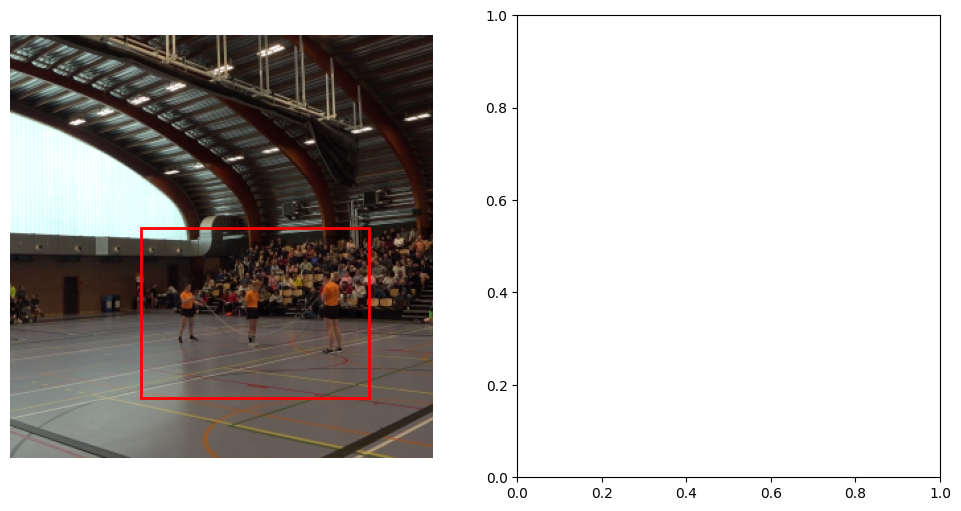

In [9]:
plot([f], [y])

In [10]:
repo.VideoNames.head()

folderId   id                                               name
id                                                                   
642         3  642           competition/belgium/DD3/2023-PK-ZO-7.mp4
643         3  643  competition/belgium/DD3/2023-PK-ZO-8-3DD-Lara.mp4
644         3  644           competition/belgium/DD3/2023-PK-ZO-9.mp4
645         3  645          competition/belgium/DD3/2023-proef-za.mp4
646         3  646          competition/belgium/DD3/2023-proef-zo.mp4

In [11]:
repo.VideoNames.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 642 to 1448
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   folderId  299 non-null    int64 
 1   id        299 non-null    int64 
 2   name      299 non-null    object
dtypes: int64(2), object(1)
memory usage: 17.4+ KB


In [12]:
repo.VideoNames.loc[1319]["name"]

'competition/belgium/DD3/2024-dd3-sipiro-senioren-maud-pkb-j1.mp4'

In [13]:
from DataGeneratorFrames import DataGeneratorFrames

connection established, loading frame paths
rel paths of framelabels loaded
DataGeneratorSkillBorders init done
Current memory usage: 0.8339614868164062 gigabytes


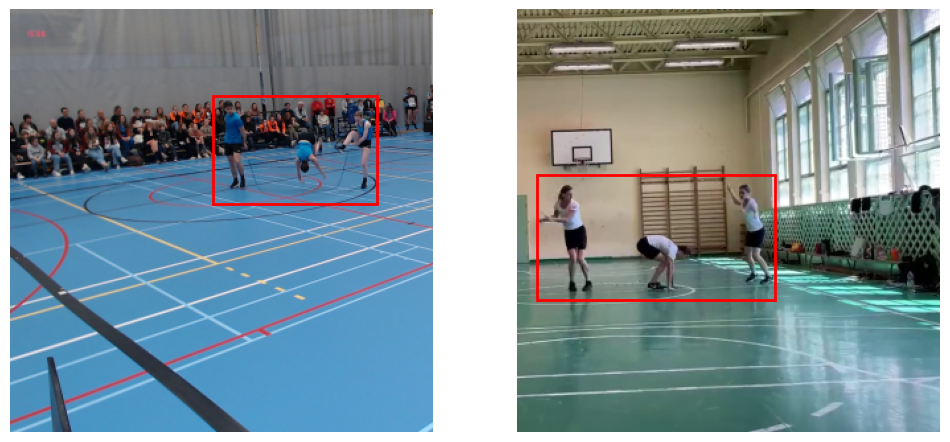

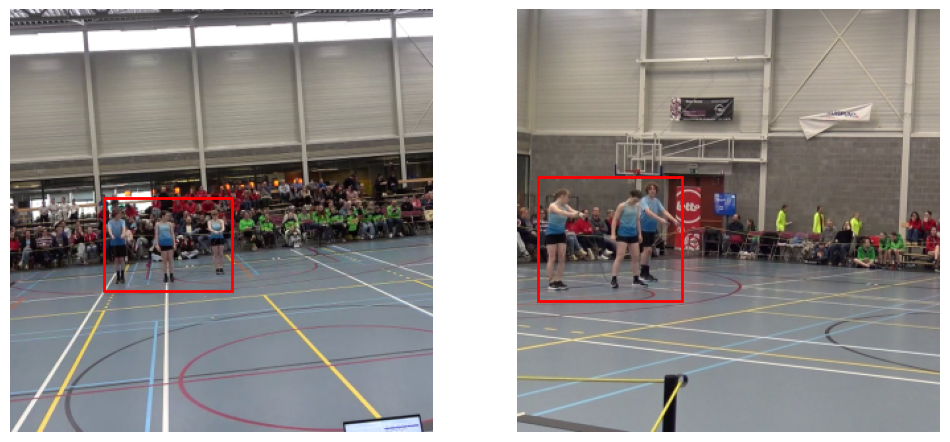

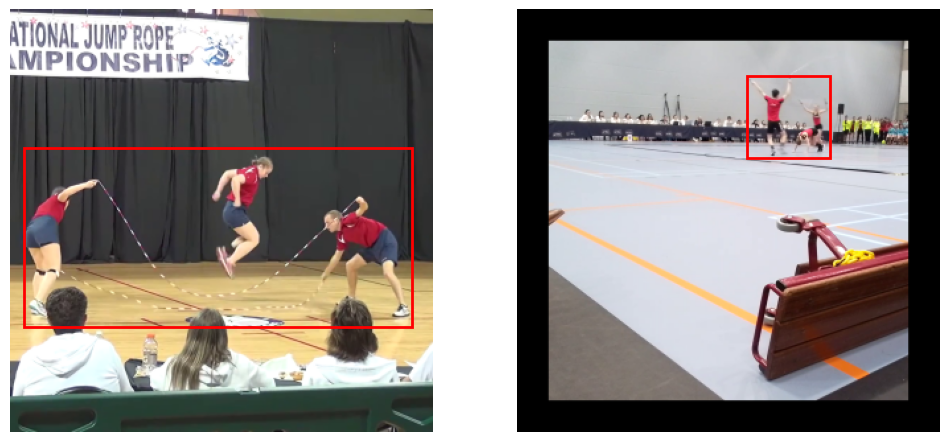

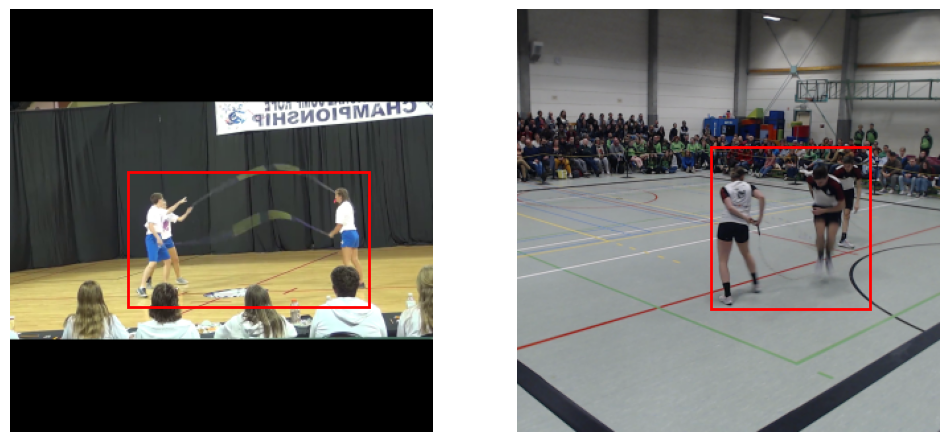

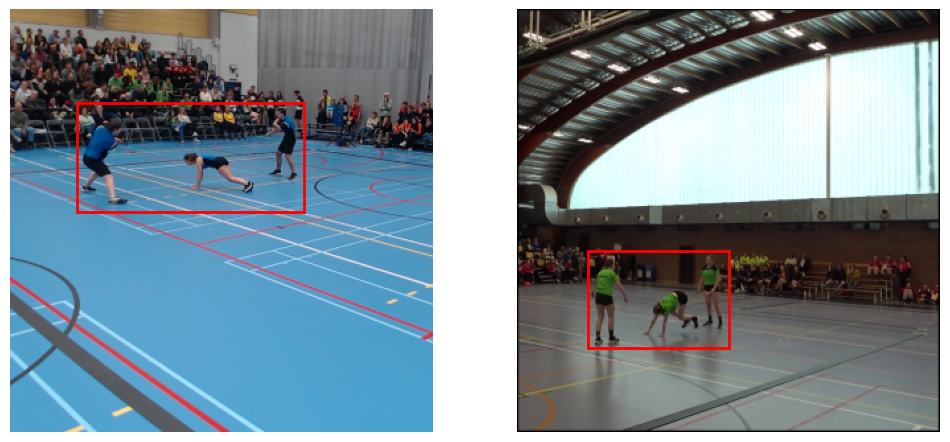

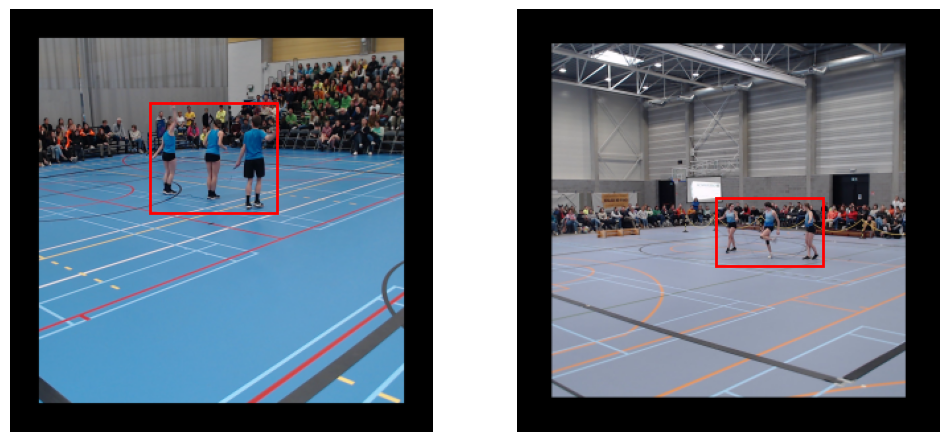

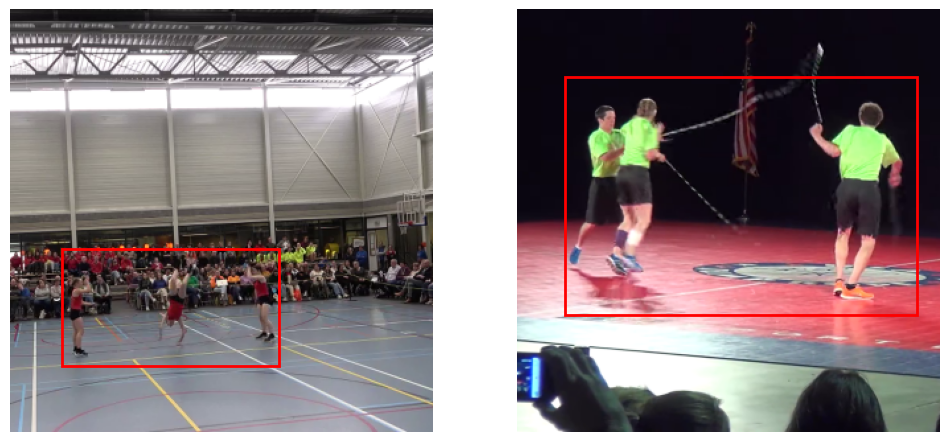

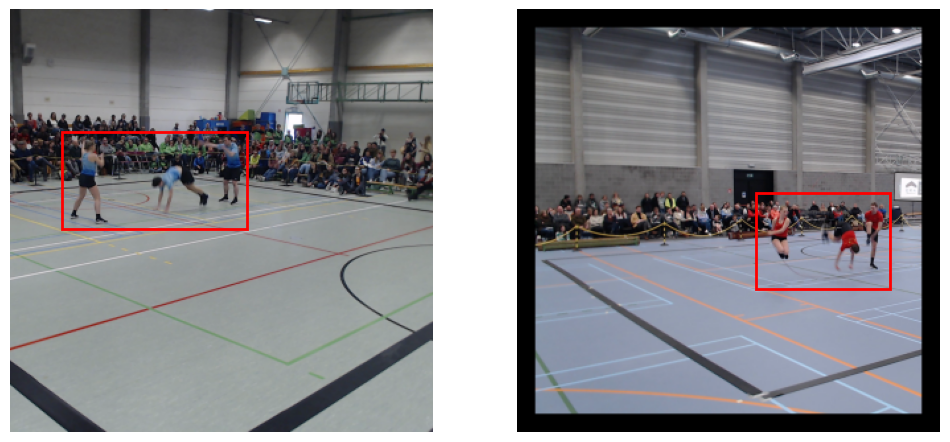

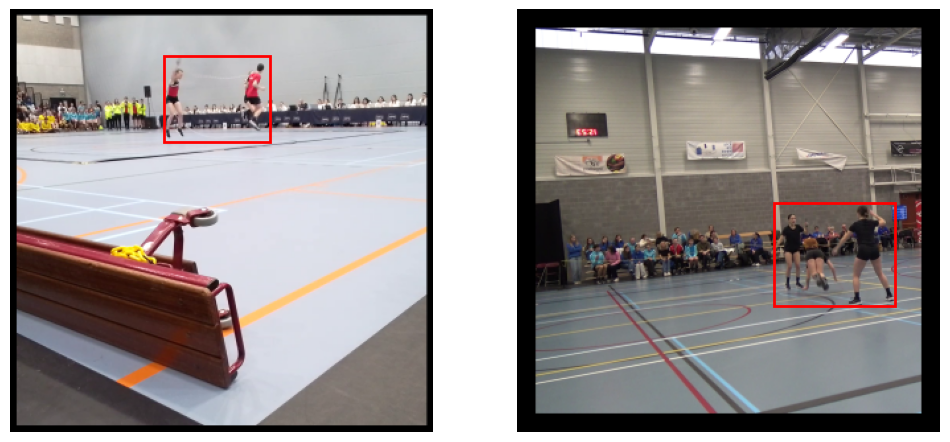

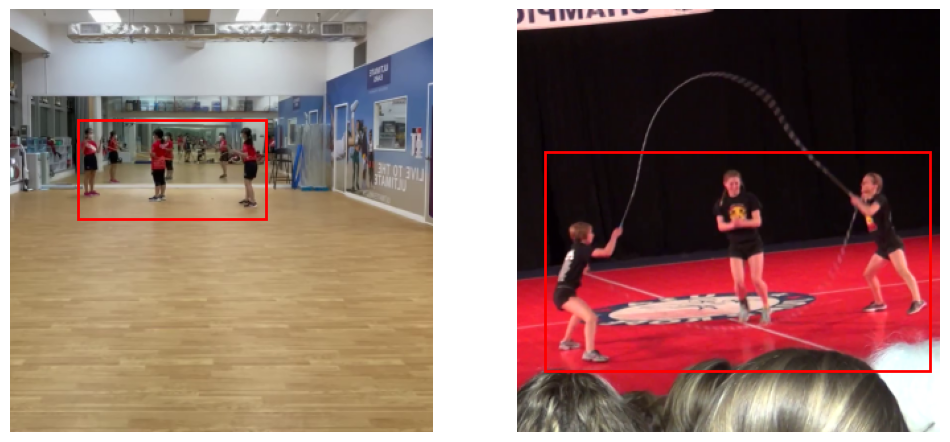

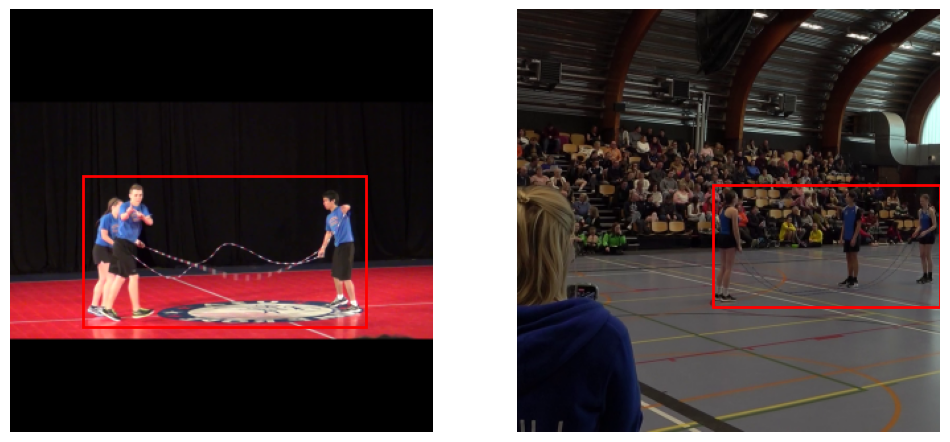

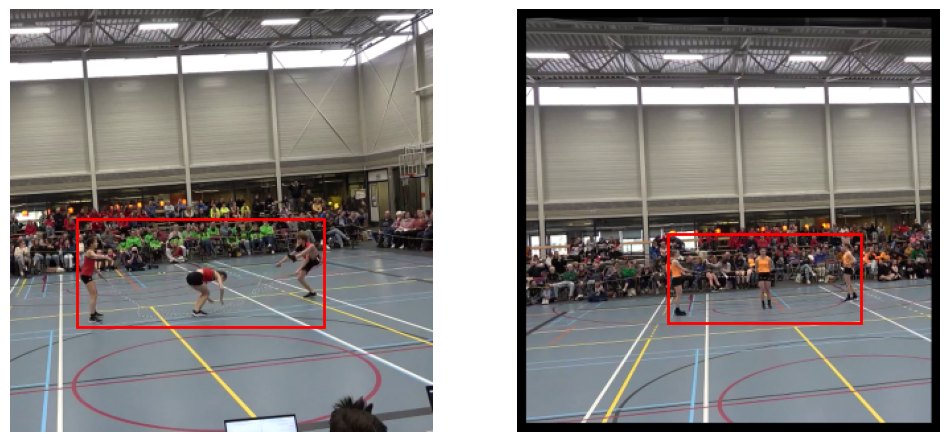

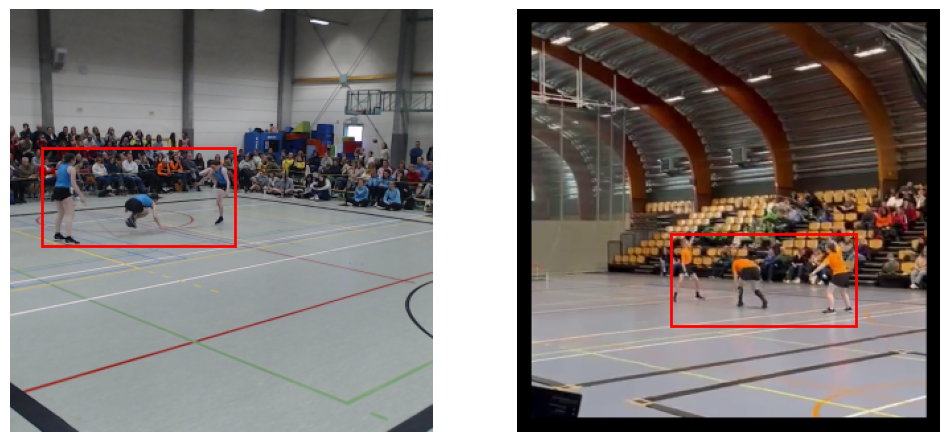

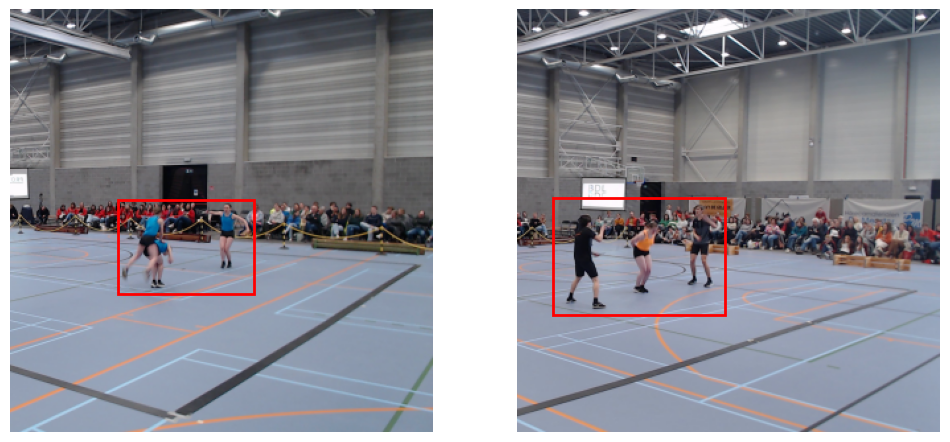

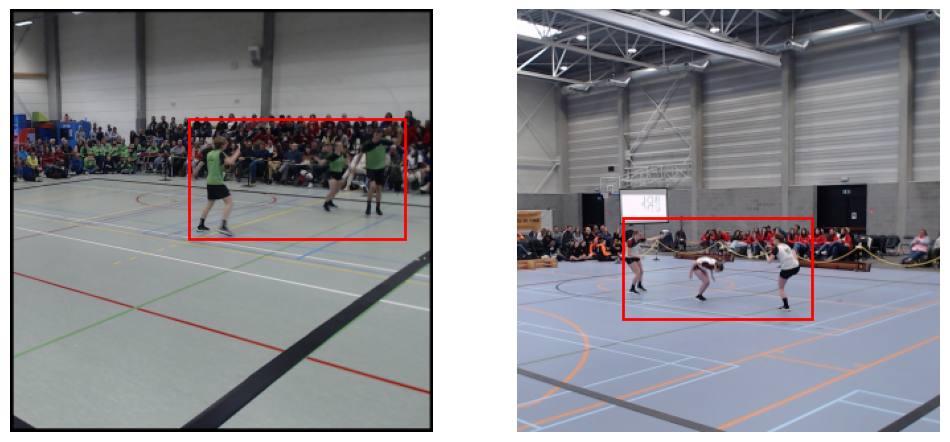

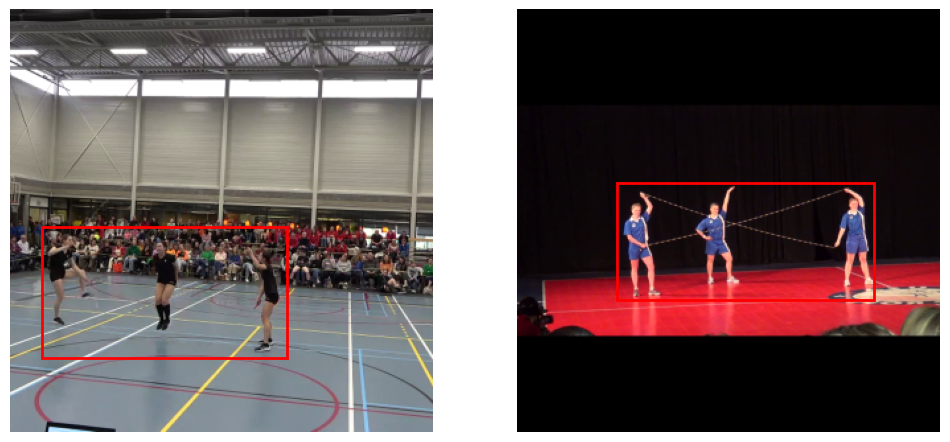

Current memory usage: 0.9397087097167969 gigabytes
CPU times: user 1min 2s, sys: 1.22 s, total: 1min 3s
Wall time: 15 s


In [14]:
%%time

train_gen = DataGeneratorFrames(
    frameloader=frameloader,
    train_test_val="train",
    dim=(320,320),
    batch_size=32
)

print(f"Current memory usage: {process_memory()} gigabytes")
images_with_borders = [train_gen.__getitem__(i, normalize=False) for i in range(min(train_gen.__len__(), 1))]
for X, y in images_with_borders:
    for j in range(len(X)//2):
        plot(X[j*2:j*2+2], y[j*2:j*2+2])

print(f"Current memory usage: {process_memory()} gigabytes")
